In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
#import ipywidgets as widgets
from utilities import get_info_from_txt
from measurements import get_measurements_from_data
import cv2
from PIL import Image



### Enter patient number (between 1 and 200)

In [9]:
patient_number = widgets.BoundedIntText(
    value=1,
    min=1,
    max=200,
    step=1,
    description='Patient #:',
    disabled=False
)
display(patient_number)

A Jupyter Widget

In [10]:
#folder with images
#path_= r'G:\ImagesForNewModel\#Original'
path_ = r'\\apollo\facial$\Jacqueline\MEEIFacialParalysisStandardSet\Normal\AbbotP\adapted'
path_=r'C:\Users\guarind\Documents\GitHub\Auto-eFace\images\normal\AbbotP\adapted'
#patient_number.value

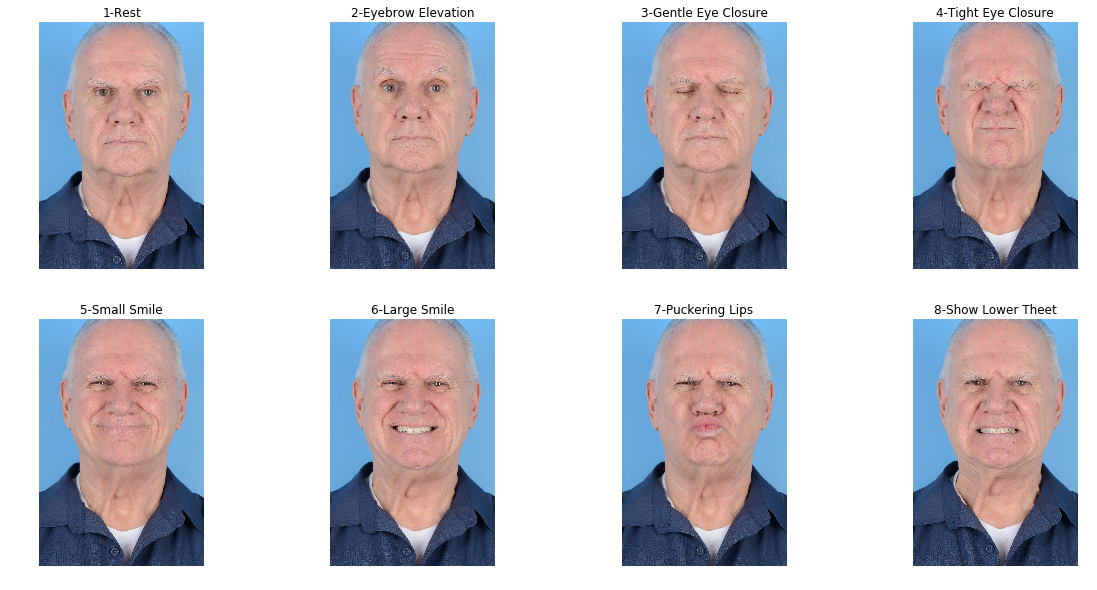

In [11]:
subfolders = [f.path for f in os.scandir(path_) if f.is_dir() ]  
for folder in subfolders:
    folder = os.path.normpath(folder)
    temp = os.path.split(folder)[-1]
    temp = temp.split()[0]
   # if temp == str(patient_number.value):
   #     break

path_= path_
all_Files = os.listdir(path_)
all_Files.sort()
ext_txt=('.txt')
Files = [i for i in all_Files if i.endswith(tuple(ext_txt))];  
ext_jpg=('.jpg')
Images = [i for i in all_Files if i.endswith(tuple(ext_jpg))];  

#show images 
f = plt.figure(figsize=(20,10))

titles =['1-Rest', '2-Eyebrow Elevation', '3-Gentle Eye Closure', '4-Tight Eye Closure', '5-Small Smile', '6-Large Smile', 
        '7-Puckering Lips', '8-Show Lower Theet']

for k,im in enumerate(Images):
    
    img=mpimg.imread(os.path.join(path_,im))
    ax = f.add_subplot(2, 4, k+1)   
    ax.axis('off')
    tt = titles[k]
    ax.set_title(tt)
    ax.imshow(img)  

### Select Healthy Side

In [12]:
Healthy_Side_select = widgets.RadioButtons(
    options=['Left', 'Right'],
    description='Heathy Side',
    disabled=False
)
display(Healthy_Side_select)

A Jupyter Widget

In [13]:
Healthy_Side = Healthy_Side_select.value
Healthy_Side

'Left'

In [11]:
Healthy_Side='Left'
titles =['1-Rest', '2-Eyebrow Elevation', '3-Gentle Eye Closure', '4-Tight Eye Closure', '5-Small Smile', '6-Large Smile', 
        '7-Puckering Lips', '8-Show Lower Theet']

path_ = r"D:\Projects_MEE\data_AutoeFace\patient 1"
Files = ["rest 1.txt",
         "eyebrow raise 1.txt",
         "gentle eye closure 1.txt",
         "tight eye closure 1.txt", 
         "Biggest smile 1.txt",
         "Biggest smile 1.txt",
         "pucker 1.txt", 
         "Lower lip 1.txt"]

In [5]:
shape=[]
lefteye = []
righteye = []
boundingbox = []
for file in Files:
    shape_, lefteye_, righteye_, boundingbox_ = get_info_from_txt(os.path.join(path_,file))
    shape.append(shape_) 
    lefteye.append(lefteye_)
    righteye.append(righteye_)
    boundingbox.append(boundingbox_)  


Now we will compute all the measurements 

In [6]:
CalibrationType='Iris'
CalibrationValue=11.77
LeftRest, RightRest, _, _,IPrest = get_measurements_from_data(shape[0], lefteye[0],righteye[0], CalibrationType, CalibrationValue)
LeftEyeBrow, RightEyeBrow, _, _, IPEyeBrow = get_measurements_from_data(shape[1], lefteye[1],righteye[1], CalibrationType, CalibrationValue)
LeftEyeClosureGently, RightEyeClosureGently, _, _, IPEyeClosureGently = get_measurements_from_data(shape[2], lefteye[2],righteye[2], CalibrationType, CalibrationValue)
LeftEyeClosureTight, RightEyeClosureTight, _, _, IPEyeClosureTight = get_measurements_from_data(shape[3], lefteye[3],righteye[3], CalibrationType, CalibrationValue)
LeftSmallSmile, RightSmallSmile, _, _, IPSmallSmile = get_measurements_from_data(shape[4], lefteye[4],righteye[4], CalibrationType, CalibrationValue)
LeftLargeSmile, RightLargeSmile, _, _, IPLargeSmile = get_measurements_from_data(shape[5], lefteye[5],righteye[5], CalibrationType, CalibrationValue)
LeftPuckeringLips, RightPuckeringLips, _, _, IPPuckeringLips = get_measurements_from_data(shape[6], lefteye[6],righteye[6], CalibrationType, CalibrationValue)
LeftDentalShow, RightDentalShow, _, _, IPDentalShow = get_measurements_from_data(shape[7], lefteye[7],righteye[7], CalibrationType, CalibrationValue)

In [7]:
LeftRest.CommissureExcursion, LeftLargeSmile.CommissureExcursion


(25.387942511452074, 32.08472231891195)

In [47]:
LeftDentalShow.MouthOpen, RightDentalShow.MouthOpen


(23.596117237430956, 27.80118025384462)

In [58]:
LeftDentalShow, RightDentalShow, _, _, IPDentalShow = get_measurements_from_data(shape[7], lefteye[7],righteye[7], CalibrationType, CalibrationValue)
np.sqrt((IPDentalShow.mid_upper_insidelip_left[0]-IPDentalShow.mid_lower_insidelip_left[0])**2 + (IPDentalShow.mid_upper_insidelip_left[1]-IPDentalShow.mid_lower_insidelip_left[1])**2), np.sqrt((IPDentalShow.mid_upper_insidelip_right[0]-IPDentalShow.mid_lower_insidelip_right[0])**2 + (IPDentalShow.mid_upper_insidelip_right[1]-IPDentalShow.mid_lower_insidelip_right[1])**2)

119.76012880060748
40.84013585695479


(119.76012880060708, 40.840135856954745)

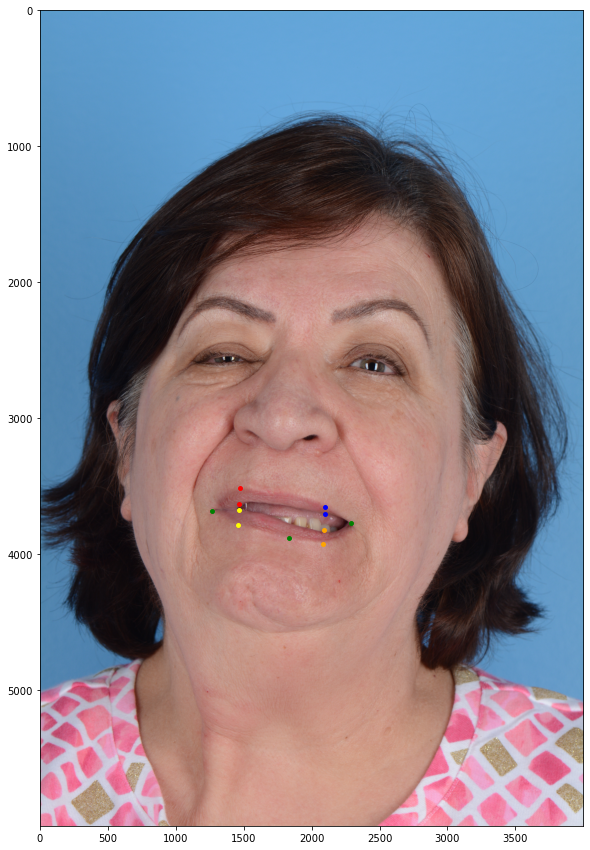

In [60]:
plt.figure(figsize=(10,15))
plt.imshow(Image.open(r"D:\Projects_MEE\data_AutoeFace\patient 1\Lower lip 1.jpg"))
plt.scatter(IPDentalShow.mid_upper_insidelip_left[0],IPDentalShow.mid_upper_insidelip_left[1],s=15, color='blue')
plt.scatter(IPDentalShow.mid_lower_insidelip_left[0],IPDentalShow.mid_lower_insidelip_left[1],s=15, color='orange')
plt.scatter(IPDentalShow.mid_upper_lip_left[0],IPDentalShow.mid_upper_lip_left[1],s=15, color='blue')
plt.scatter(IPDentalShow.mid_lower_lip_left[0],IPDentalShow.mid_lower_lip_left[1],s=15, color='orange')
plt.scatter(IPDentalShow.mid_upper_insidelip_right[0],IPDentalShow.mid_upper_insidelip_right[1],s=15, color='red')
plt.scatter(IPDentalShow.mid_lower_insidelip_right[0],IPDentalShow.mid_lower_insidelip_right[1],s=15, color='yellow')
plt.scatter(IPDentalShow.mid_upper_lip_right[0],IPDentalShow.mid_upper_lip_right[1],s=15, color='red')
plt.scatter(IPDentalShow.mid_lower_lip_right[0],IPDentalShow.mid_lower_lip_right[1],s=15, color='yellow')
plt.scatter(IPDentalShow.cross_lower_lip[0],IPDentalShow.cross_lower_lip[1],s=15, color='green')
plt.scatter(IPDentalShow.left_corner_mouth[0],IPDentalShow.left_corner_mouth[1],s=15, color='green')
plt.scatter(IPDentalShow.right_corner_mouth[0],IPDentalShow.right_corner_mouth[1],s=15, color='green')

## Static Measurements 

In [16]:
# I'm following Tessa's nomenclature 

# 1) EyeBrow Elevation at rest
a_left, a_right = LeftRest.BrowHeight, RightRest.BrowHeight
if Healthy_Side == 'Right':
    Brow_at_rest = a_left/a_right
else:
    Brow_at_rest = a_right/a_left

Brow_at_rest = np.round(Brow_at_rest*100,1)


# 2) Palpebral Fissure width at rest
c_left, c_right = LeftRest.PalpebralFissureHeight, RightRest.PalpebralFissureHeight
if Healthy_Side == 'Right':
    PalpebralFissure_at_rest = c_right/c_left
else:
    PalpebralFissure_at_rest = c_left/c_right

PalpebralFissure_at_rest = np.round(PalpebralFissure_at_rest*100,1)

# 3) Oral commissure at rest 
e_right, d_right = np.sin((RightRest.SmileAngle-90)*np.pi/180)*RightRest.CommissureExcursion, np.cos((RightRest.SmileAngle-90)*np.pi/180)*RightRest.CommissureExcursion
e_left, d_left = np.sin((LeftRest.SmileAngle-90)*np.pi/180)*LeftRest.CommissureExcursion, np.cos((LeftRest.SmileAngle-90)*np.pi/180)*LeftRest.CommissureExcursion
if Healthy_Side == 'Right':
    #e_left is the disease side
    if e_left < e_right and e_left > 0:
        OralCommissure_at_rest = 1-((e_right - e_left)/e_right)
    else:
        OralCommissure_at_rest = d_left/d_right
else:
    #e_right is the disease side
    if e_right < e_left and e_right > 0:
        OralCommissure_at_rest = 1-((e_left - e_right)/e_left)
    else:
        OralCommissure_at_rest = d_right/d_left

OralCommissure_at_rest = np.round(OralCommissure_at_rest*100,1)

In [19]:
Brow_at_rest, PalpebralFissure_at_rest,OralCommissure_at_rest 

(80.1, 134.6, 125.4)

In [20]:
e_right, e_left, d_right, d_left

(3.664688981276588, 3.5378092845995037, 31.515194630429882, 25.140237278725056)

In [21]:
(1-((7.1-6.4)/7.1))*100

90.14084507042254

In [22]:
Static_Score = np.array([abs(100-Brow_at_rest), abs(100-PalpebralFissure_at_rest), abs(100-OralCommissure_at_rest )]).sum()
np.round(Static_Score,1)

79.9

## Dynamic Measurements 

In [61]:
# 4) Brow Elevation 
b_left, b_right = LeftEyeBrow.BrowHeight, RightEyeBrow.BrowHeight
if Healthy_Side == 'Right':
    EyeBrowElevation = (b_left - a_left)/(b_right - a_right)
else:
    EyeBrowElevation = (b_right - a_right)/(b_left - a_left)


EyeBrowElevation = np.round(EyeBrowElevation*100,1)

# 5)Eye closure gentle 
g_left_gentle, g_right_gentle = LeftEyeClosureTight.PalpebralFissureHeight , RightEyeClosureTight.PalpebralFissureHeight
#g might be negative (measurement errors)
if Healthy_Side == 'Right':
    GentleEyeClosure = (c_left - abs(g_left_gentle))/c_left
else:
    GentleEyeClosure = (c_right - abs(g_right_gentle))/c_right
    
GentleEyeClosure = np.round(GentleEyeClosure*100,1)

# 6)Eye closure full 
g_left_full, g_right_full = LeftEyeClosureTight.PalpebralFissureHeight, RightEyeClosureTight.PalpebralFissureHeight 
if Healthy_Side == 'Right':
    FullEyeClosure = (c_left - abs(g_left_full))/c_left
else:
    FullEyeClosure = (c_right - abs(g_right_full))/c_right
    
FullEyeClosure = np.round(FullEyeClosure*100,1)


# 6) Oral Commissure with Smile
# question for Tessa -> Is this with small or large smile? I'll do it with large smile for the moment
f_left, f_right = LeftRest.CommissureExcursion, RightRest.CommissureExcursion
h_left, h_right = LeftLargeSmile.CommissureExcursion, RightLargeSmile.CommissureExcursion
#if with small smile, then comment above line an uncomment line below
# h_left, h_right = LeftSmallSmile.CommissureExcursion, RightSmallSmile.CommissureExcursion
if Healthy_Side == 'Right':
    OralCommissureWithSmile =  (h_left - f_left)/(h_right - f_right)
else:
    OralCommissureWithSmile = (h_right - f_right)/(h_left - f_left)
    
OralCommissureWithSmile = np.round(OralCommissureWithSmile*100,1)

#7) Lower Lip EEE

j_left, j_right = LeftDentalShow.DentalShow, RightDentalShow.DentalShow
if Healthy_Side == 'Right':
    #making sure that it will work if j_right is zero 
    try:
        LowerLipEEE = j_left/j_right
    except:
        LowerLipEEE = np.nan
else:
    #making sure that it will work if j_left is zero 
    try:
        LowerLipEEE = j_right/j_left
    except:
        LowerLipEEE = np.nan  
    
LowerLipEEE = np.round(LowerLipEEE*100,1)    

In [62]:
EyeBrowElevation, GentleEyeClosure, FullEyeClosure, OralCommissureWithSmile, LowerLipEEE

(61.0, 97.5, 97.5, 41.8, 34.1)

In [32]:
LeftDentalShow.MouthOpen, RightDentalShow.MouthOpen

(23.596117237430956, 27.80118025384462)

In [25]:
Dynamic_Score = np.array([abs(100-EyeBrowElevation), abs(100-GentleEyeClosure), abs(100-FullEyeClosure), abs(100-OralCommissureWithSmile), abs(100-LowerLipEEE)]).sum()
np.round(Dynamic_Score,1)

120.0

## Synkineis Measurements 

In [26]:
#Ocular synkinesis 
k1_left, k1_right = LeftLargeSmile.PalpebralFissureHeight, RightLargeSmile.PalpebralFissureHeight
k2_left, k2_right = LeftPuckeringLips.PalpebralFissureHeight, RightPuckeringLips.PalpebralFissureHeight
if Healthy_Side == 'Right':
    OcularSynkinesis1 = k1_left/k1_right
    OcularSynkinesis2 = k2_left/k2_right
else:
    OcularSynkinesis1 = k1_right/k1_left
    OcularSynkinesis2 = k2_right/k2_left

if  OcularSynkinesis1 <=  OcularSynkinesis2:
     OcularSynkinesis =  OcularSynkinesis1 
else:
     OcularSynkinesis =  OcularSynkinesis2
        
OcularSynkinesis = np.round(OcularSynkinesis*100,1)

In [27]:
OcularSynkinesis1, OcularSynkinesis2

(0.5542097928710534, 0.631324975563078)

In [29]:
Synkinesis_Score = abs(100-OcularSynkinesis)
Synkinesis_Score

44.6

[Text(0,0,'Ocular Synkinesis')]

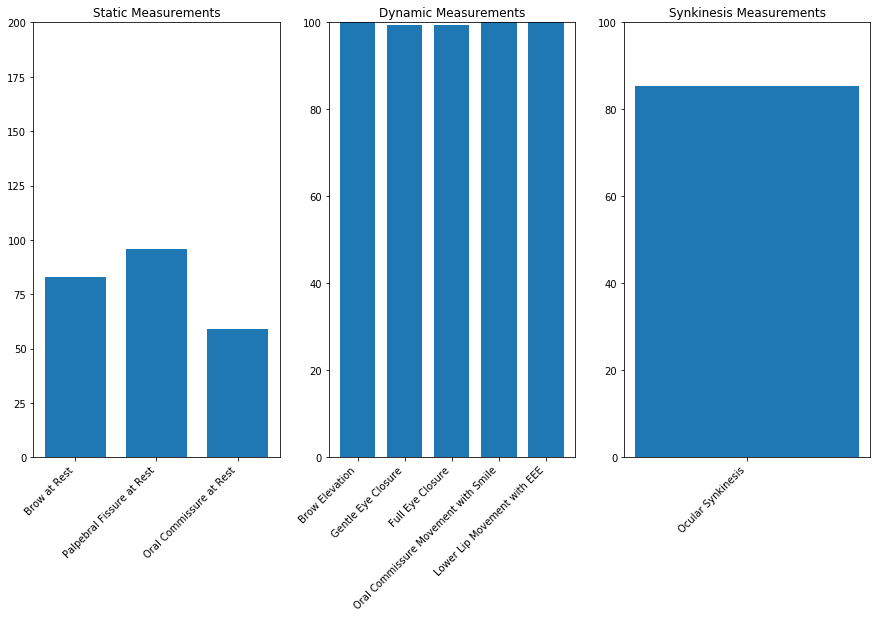

In [30]:
#plotting results 
#show images 
f2 = plt.figure(figsize=(15,8))

ax1 = f2.add_subplot(1, 3, 1)
ax1.set_title('Static Measurements')
ax1.bar([0,1,2], [Brow_at_rest, PalpebralFissure_at_rest,OralCommissure_at_rest], 0.75,  align = 'center')  
ax1.set_ylim(0,200)
ax1.set_xticks([0,1,2],minor=False)
ax1.set_xticklabels(['Brow at Rest','Palpebral Fissure at Rest','Oral Commissure at Rest'],minor=False, rotation=45,  ha="right")


ax2 = f2.add_subplot(1, 3, 2)
ax2.set_title('Dynamic Measurements')
ax2.bar([0,1,2,3,4], [EyeBrowElevation, GentleEyeClosure, FullEyeClosure, OralCommissureWithSmile, LowerLipEEE], 0.75,  align = 'center')  
ax2.set_ylim(0,100)
ax2.set_xticks([0,1,2,3,4],minor=False)
ax2.set_xticklabels(['Brow Elevation','Gentle Eye Closure','Full Eye Closure','Oral Commissure Movement with Smile', 'Lower Lip Movement with EEE'],minor=False, rotation=45,  ha="right")


ax3 = f2.add_subplot(1, 3, 3)
ax3.set_title('Synkinesis Measurements')
ax3.bar([0], [OcularSynkinesis], 0.75,  align = 'center')  
ax3.set_ylim(0,100)
ax3.set_xticks([0],minor=False)
ax3.set_xticklabels(['Ocular Synkinesis'],minor=False, rotation=45,  ha="right")


In [31]:
if Brow_at_rest<= 100:
    score_brow_rest = Brow_at_rest
else:
    score_brow_rest = 100 - abs(100-Brow_at_rest)
    
if PalpebralFissure_at_rest<= 100:
    score_PalpebralFissure_rest = PalpebralFissure_at_rest
else:
    score_PalpebralFissure_rest = 100 - abs(100-PalpebralFissure_at_rest)
    
if OralCommissure_at_rest<= 100:
    score_OralCommissure_rest = OralCommissure_at_rest
else:
    score_OralCommissure_rest = 100 - abs(100-OralCommissure_at_rest)
    
StaticScore = (score_brow_rest + score_PalpebralFissure_rest + score_OralCommissure_rest)/3
DynamicScore = (EyeBrowElevation + GentleEyeClosure + FullEyeClosure + OralCommissureWithSmile + LowerLipEEE)/5
SynkinesisScore = OcularSynkinesis


TotalScore = (StaticScore+DynamicScore+SynkinesisScore)/3
StaticScore, DynamicScore, SynkinesisScore ,TotalScore 

(79.36666666666667, 109.16, 85.3, 91.27555555555556)

## Compare with eFace

[Text(0, 0, 'Ocular Synkinesis')]

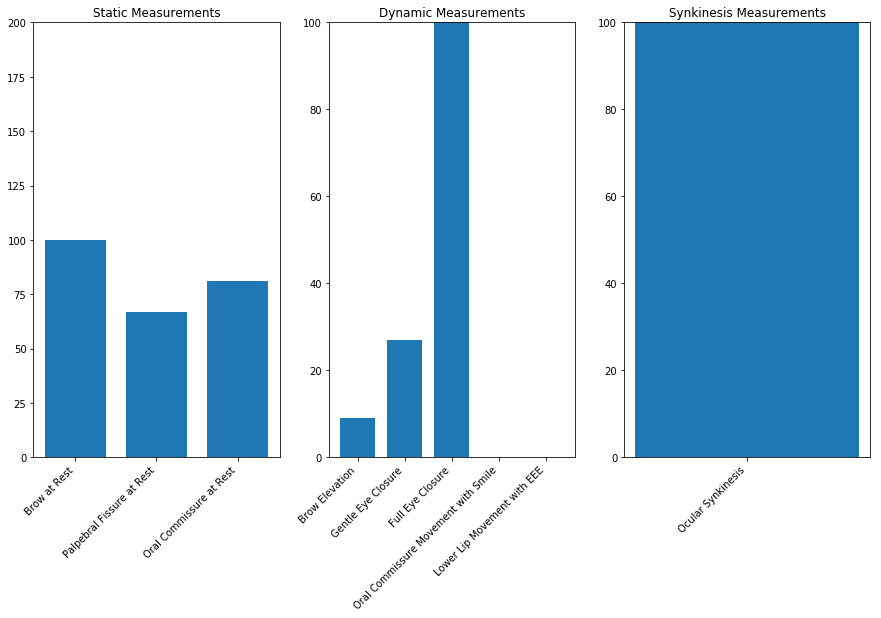

In [66]:
#load eFace from cvs file provided by Emily 
file_location = r'\\apollo\facial$\All Media and CRC Info\Photos to Compare eFACE to Emotrics'
eFACE = pd.read_excel(os.path.join(file_location,'eFACE Data.xlsx'))
eFACE.set_index('Subject ID', inplace=True)
#get the corresponding eFACE values
eFACE_Brow_at_rest, eFACE_PalpebralFissure_at_rest,eFACE_OralCommissure_at_rest = eFACE.iloc[patient_number.value-1][[4,5,7]]
eFACE_EyeBrowElevation, eFACE_GentleEyeClosure, eFACE_FullEyeClosure, eFACE_OralCommissureWithSmile, eFACE_LowerLipEEE = eFACE.iloc[patient_number.value-1][[9,10,11,13,15]]
eFACE_OcularSynkinesis = eFACE.iloc[patient_number.value-1][17] 

#plotting results 
#show images 
f2 = plt.figure(figsize=(15,8))

ax1 = f2.add_subplot(1, 3, 1)
ax1.set_title('Static Measurements')
ax1.bar([0,1,2], [eFACE_Brow_at_rest, eFACE_PalpebralFissure_at_rest,eFACE_OralCommissure_at_rest], 0.75,  align = 'center')  
ax1.set_ylim(0,200)
ax1.set_xticks([0,1,2],minor=False)
ax1.set_xticklabels(['Brow at Rest','Palpebral Fissure at Rest','Oral Commissure at Rest'],minor=False, rotation=45,  ha="right")


ax2 = f2.add_subplot(1, 3, 2)
ax2.set_title('Dynamic Measurements')
ax2.bar([0,1,2,3,4], [eFACE_EyeBrowElevation, eFACE_GentleEyeClosure, eFACE_FullEyeClosure, eFACE_OralCommissureWithSmile, eFACE_LowerLipEEE], 0.75,  align = 'center')  
ax2.set_ylim(0,100)
ax2.set_xticks([0,1,2,3,4],minor=False)
ax2.set_xticklabels(['Brow Elevation','Gentle Eye Closure','Full Eye Closure','Oral Commissure Movement with Smile', 'Lower Lip Movement with EEE'],minor=False, rotation=45,  ha="right")


ax3 = f2.add_subplot(1, 3, 3)
ax3.set_title('Synkinesis Measurements')
ax3.bar([0], [eFACE_OcularSynkinesis], 0.75,  align = 'center')  
ax3.set_ylim(0,100)
ax3.set_xticks([0],minor=False)
ax3.set_xticklabels(['Ocular Synkinesis'],minor=False, rotation=45,  ha="right")


In [128]:
eFACE_Brow_at_rest, eFACE_PalpebralFissure_at_rest,eFACE_OralCommissure_at_rest

(100, 67, 81)

In [129]:
im = '1.jpg'
image = cv2.imread(os.path.join(path_,im))
for var in vars(IPrest):
    a = getattr(IPrest, var)
    cv2.circle(image,(int(a[0]),int(a[1])), 5, (0,0,255), -1)

In [130]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

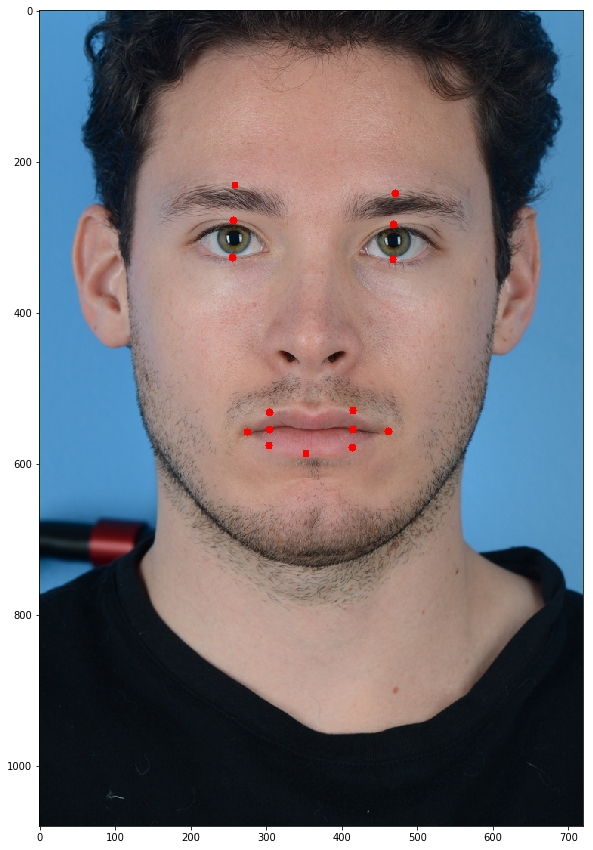

In [131]:
f = plt.figure(figsize=(15,15))
plt.imshow(image)

In [65]:
a=np.array([[5,4],[2,3]])
b=np.array([[5,4],[2,3]])
(a==b).all()

True